In [87]:
import pandas as pd  
import numpy as np  
import tensorflow as tf  
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Datasets Greenhouse Data
temp_emissions_data_raw = pd.read_csv('Datasets/TempEmissionsDataRaw.csv')
temp_emissions_data = pd.read_csv('Datasets/TempEmissionsData.csv') # Emissions normalized (10^3)

In [3]:
temp_emissions_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14826 entries, 0 to 14825
Data columns (total 4 columns):
Year                  14826 non-null int64
Country               14826 non-null object
AverageTemperature    14826 non-null float64
EmissionsValue        14826 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 463.4+ KB


In [4]:
temp_emissions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 3 columns):
Year                  263 non-null int64
AverageTemperature    263 non-null float64
EmissionsValue        263 non-null float64
dtypes: float64(2), int64(1)
memory usage: 6.2 KB


In [5]:
# Remove Year Column
temp_emissions_data_no_year = temp_emissions_data.drop('Year', axis=1)
temp_emissions_data_no_year

,AverageTemperature,EmissionsValue
0,5.890000,2.552000
1,3.130000,2.553000
2,8.430000,2.553000
3,8.340000,2.554000
4,8.050000,2.555000
5,8.540000,2.731000
6,8.500000,2.732000
7,7.700000,2.733000
8,8.680000,2.734000
9,8.030000,2.734000


In [6]:
temp_emissions_data_no_year.describe().T

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,263.0,11.539664,5.778322,3.130000,6.742321,8.73000,16.635176,20.930000
EmissionsValue,263.0,12.059036,10.797191,1.434143,2.788994,9.70337,18.159720,47.044396


In [19]:
# Get the features
X = temp_emissions_data_no_year['EmissionsValue'].to_frame() # independent variable - GasEmissions
y = temp_emissions_data_no_year['AverageTemperature'].to_frame() # dependent variable - AverageTemperature

In [20]:
## Split data into train, test and validation set

In [21]:
# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)  

In [22]:
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

In [23]:
# Reshape X values for 2D array
#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)
#X_val = X_val.reshape(-1, 1)

In [24]:
X_train.shape, X_test.shape, X_val.shape  
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))  
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))  
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   210, Training features   1
Validation instances 27, Validation features 1
Testing instances    26, Testing features    1


In [25]:
# Define the feature columns - Only gas emissions in this case
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns] 
feature_cols

[_NumericColumn(key='EmissionsValue', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [26]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,  
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_global_id_in_cluster': 0, '_save_checkpoints_steps': None, '_num_ps_replicas': 0, '_master': '', '_keep_checkpoint_max': 5, '_session_config': None, '_is_chief': True, '_num_worker_replicas': 1, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f99f01d3080>, '_evaluation_master': '', '_task_type': 'worker', '_log_step_count_steps': 100, '_model_dir': 'tf_wx_model', '_save_checkpoints_secs': 600, '_task_id': 0, '_tf_random_seed': None, '_service': None}


In [27]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):  
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [81]:
evaluations = []  

# Steps are used to calculate the number of epochs, which is based on the following calculation:
# (100 X 215 / 1.25) = 17200 epochs
# STEPS <= 150  -> OK
# STEPS >= 200 && <= 250 -> Better
# STEPS > 250 -> No bueno
STEPS = 215 # The best so far
for i in range(100):  
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into tf_wx_model/model.ckpt.
INFO:tensorflow:step = 1, loss = 99976.2
INFO:tensorflow:global_step/sec: 129.737
INFO:tensorflow:step = 101, loss = 3687.9531 (0.760 sec)
INFO:tensorflow:global_step/sec: 180.698
INFO:tensorflow:step = 201, loss = 3191.9775 (0.553 sec)
INFO:tensorflow:Saving checkpoints for 215 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 4341.8096.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-29-16:27:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-215
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow

INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-1505
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-29-16:28:02
INFO:tensorflow:Saving dict for global step 1505: average_loss = 6.6842613, global_step = 1505, loss = 180.47505
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-1505
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1506 into tf_wx_model/model.ckpt.
INFO:tensorflow:step = 1506, loss = 2181.213
INFO:tensorflow:global_step/sec: 167.075
INFO:tensorflow:step = 1606, loss = 2309.2761 (0.606 sec)
INFO:tensorflow:global_step/sec: 169.83
INFO:tensorflow:step = 1706, loss = 2260.3555 (0.587 sec)
INFO:tensorflow:Saving checkpoints for 1720 into tf_w

INFO:tensorflow:step = 2896, loss = 2232.396 (0.681 sec)
INFO:tensorflow:global_step/sec: 181.352
INFO:tensorflow:step = 2996, loss = 2413.521 (0.548 sec)
INFO:tensorflow:Saving checkpoints for 3010 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 2559.1.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-29-16:28:29
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-3010
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-29-16:28:31
INFO:tensorflow:Saving dict for global step 3010: average_loss = 6.7968535, global_step = 3010, loss = 183.51505
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-3010
INFO:tens

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-4300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4301 into tf_wx_model/model.ckpt.
INFO:tensorflow:step = 4301, loss = 2340.7517
INFO:tensorflow:global_step/sec: 204.088
INFO:tensorflow:step = 4401, loss = 2351.4382 (0.494 sec)
INFO:tensorflow:global_step/sec: 211.465
INFO:tensorflow:step = 4501, loss = 2233.9912 (0.475 sec)
INFO:tensorflow:Saving checkpoints for 4515 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 2205.1729.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-29-16:28:56
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-4515
INFO:tensorflow:Running local_init_op.
INFO:tensor

INFO:tensorflow:Starting evaluation at 2018-10-29-16:29:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-5805
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-29-16:29:16
INFO:tensorflow:Saving dict for global step 5805: average_loss = 6.557068, global_step = 5805, loss = 177.04083
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-5805
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5806 into tf_wx_model/model.ckpt.
INFO:tensorflow:step = 5806, loss = 2394.4941
INFO:tensorflow:global_step/sec: 132.516
INFO:tensorflow:step = 5906, loss = 2152.0723 (0.816 sec)
INFO:tensorflow:global_step/sec: 95.0341
INFO:tensorflo

INFO:tensorflow:step = 7096, loss = 2299.9993
INFO:tensorflow:global_step/sec: 98.0302
INFO:tensorflow:step = 7196, loss = 1975.312 (1.033 sec)
INFO:tensorflow:global_step/sec: 142.229
INFO:tensorflow:step = 7296, loss = 2146.5015 (0.698 sec)
INFO:tensorflow:Saving checkpoints for 7310 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1877.9263.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-29-16:29:46
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-7310
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-29-16:29:46
INFO:tensorflow:Saving dict for global step 7310: average_loss = 6.3211184, global_step = 7310, loss = 170.6702
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-8600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 8601 into tf_wx_model/model.ckpt.
INFO:tensorflow:step = 8601, loss = 2024.4434
INFO:tensorflow:global_step/sec: 162.69
INFO:tensorflow:step = 8701, loss = 1952.4937 (0.628 sec)
INFO:tensorflow:global_step/sec: 197.495
INFO:tensorflow:step = 8801, loss = 1973.5142 (0.500 sec)
INFO:tensorflow:Saving checkpoints for 8815 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1998.1611.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-29-16:30:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-8815
INFO:tensorflow:R

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-29-16:30:44
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-10105
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-29-16:30:44
INFO:tensorflow:Saving dict for global step 10105: average_loss = 6.478174, global_step = 10105, loss = 174.9107
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-10105
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 10106 into tf_wx_model/model.ckpt.
INFO:tensorflow:step = 10106, loss = 2031.9443
INFO:tensorflow:global_step/sec: 179.902
INFO:tensorflow:step = 10206, loss = 1923.376 (0.553 sec)
INFO:tensor

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 11396 into tf_wx_model/model.ckpt.
INFO:tensorflow:step = 11396, loss = 1842.249
INFO:tensorflow:global_step/sec: 215.56
INFO:tensorflow:step = 11496, loss = 1941.4775 (0.475 sec)
INFO:tensorflow:global_step/sec: 207.341
INFO:tensorflow:step = 11596, loss = 1884.3062 (0.479 sec)
INFO:tensorflow:Saving checkpoints for 11610 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1769.3181.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-29-16:31:11
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-11610
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-29-16:31:12
INFO:tensorflow:Saving dict for global step 11610: average_loss = 6.1775856, global_step = 11610, loss = 166.79482
INFO:tensorflow:Ca

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-29-16:31:35
INFO:tensorflow:Saving dict for global step 12900: average_loss = 6.129132, global_step = 12900, loss = 165.48656
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-12900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 12901 into tf_wx_model/model.ckpt.
INFO:tensorflow:step = 12901, loss = 1697.2484
INFO:tensorflow:global_step/sec: 157.902
INFO:tensorflow:step = 13001, loss = 1983.0902 (0.642 sec)
INFO:tensorflow:global_step/sec: 194.138
INFO:tensorflow:step = 13101, loss = 1930.8787 (0.514 sec)
INFO:tensorflow:Saving checkpoints for 13115 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1832

INFO:tensorflow:step = 14291, loss = 1723.7258 (0.657 sec)
INFO:tensorflow:global_step/sec: 166.247
INFO:tensorflow:step = 14391, loss = 1896.1287 (0.599 sec)
INFO:tensorflow:Saving checkpoints for 14405 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1884.5886.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-29-16:32:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-14405
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-29-16:32:02
INFO:tensorflow:Saving dict for global step 14405: average_loss = 5.841471, global_step = 14405, loss = 157.71973
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-1440

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-15695
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 15696 into tf_wx_model/model.ckpt.
INFO:tensorflow:step = 15696, loss = 1666.9506
INFO:tensorflow:global_step/sec: 218.668
INFO:tensorflow:step = 15796, loss = 1846.6654 (0.469 sec)
INFO:tensorflow:global_step/sec: 213.467
INFO:tensorflow:step = 15896, loss = 1563.3674 (0.468 sec)
INFO:tensorflow:Saving checkpoints for 15910 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1978.7174.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-29-16:32:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-15910
INFO:tens

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-29-16:32:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-17200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-29-16:32:49
INFO:tensorflow:Saving dict for global step 17200: average_loss = 5.61341, global_step = 17200, loss = 151.56207
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-17200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 17201 into tf_wx_model/model.ckpt.
INFO:tensorflow:step = 17201, loss = 1693.7915
INFO:tensorflow:global_step/sec: 119.134
INFO:tensorflow:step = 17301, loss 

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 18491 into tf_wx_model/model.ckpt.
INFO:tensorflow:step = 18491, loss = 1844.0369
INFO:tensorflow:global_step/sec: 219.816
INFO:tensorflow:step = 18591, loss = 1782.2544 (0.467 sec)
INFO:tensorflow:global_step/sec: 250.099
INFO:tensorflow:step = 18691, loss = 1871.1707 (0.394 sec)
INFO:tensorflow:Saving checkpoints for 18705 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1878.4905.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-29-16:33:24
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-18705
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-29-16:33:24
INFO:tensorflow:Saving dict for global step 18705: average_loss = 5.5773396, global_step = 1

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-29-16:33:46
INFO:tensorflow:Saving dict for global step 19995: average_loss = 5.571601, global_step = 19995, loss = 150.43323
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-19995
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 19996 into tf_wx_model/model.ckpt.
INFO:tensorflow:step = 19996, loss = 1927.9963
INFO:tensorflow:global_step/sec: 214.31
INFO:tensorflow:step = 20096, loss = 1692.2422 (0.474 sec)
INFO:tensorflow:global_step/sec: 241.682
INFO:tensorflow:step = 20196, loss = 1856.1261 (0.416 sec)
INFO:tensorflow:Saving checkpoints for 20210 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1813.

INFO:tensorflow:step = 21386, loss = 1811.8143 (0.441 sec)
INFO:tensorflow:global_step/sec: 231.954
INFO:tensorflow:step = 21486, loss = 1760.1462 (0.433 sec)
INFO:tensorflow:Saving checkpoints for 21500 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1717.4534.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-29-16:34:08
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-21500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-29-16:34:09
INFO:tensorflow:Saving dict for global step 21500: average_loss = 5.5462823, global_step = 21500, loss = 149.74962


In [82]:
# Get the first loop iteration's evaluation output.
evaluations[0] 

{'average_loss': 7.6832986, 'global_step': 215, 'loss': 207.44907}

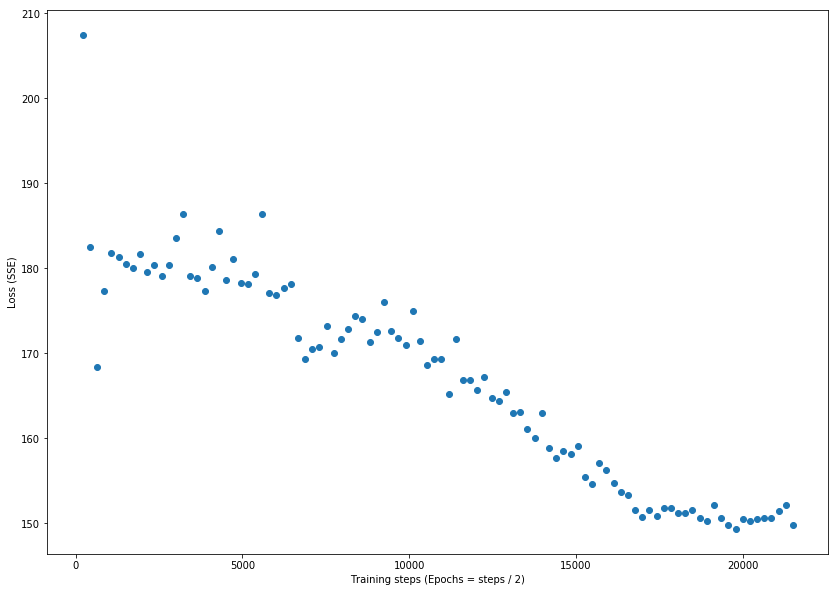

In [83]:
# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]  
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)  
plt.xlabel('Training steps (Epochs = steps / 2)')  
plt.ylabel('Loss (SSE)')  
plt.show() 

In [88]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,  
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-21500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [89]:
from sklearn import metrics

print("The Explained Variance: %.2f" % metrics.explained_variance_score(y_test, predictions))  
print("The Mean Absolute Error: %.2f degrees Celcius" % metrics.mean_absolute_error(y_test, predictions))  
print("The Median Absolute Error: %.2f degrees Celcius" % metrics.median_absolute_error(y_test, predictions))
print("The Mean Squared Error: %.2f degrees celsius" % metrics.mean_squared_error(y_test, predictions)) 
print("The Root Mean Squared Error: %.2f degrees celsius" % (np.sqrt(metrics.mean_squared_error(y_test, predictions)))) 

The Explained Variance: 0.94
The Mean Absolute Error: 1.14 degrees Celcius
The Median Absolute Error: 0.82 degrees Celcius
The Mean Squared Error: 2.19 degrees celsius
The Root Mean Squared Error: 1.48 degrees celsius
